## Inference

1. Plots the TCAV scores
2. Plots the rejection p-values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pickle

%matplotlib inline

In [149]:
# test values.
layer = "13"
tcav_scores_file = f"l{layer}_inference_word_mode_masked_test.pickle"
p_values_file = f"L{layer}_controlled.txt"

In [150]:
def plot_pvalues(txt_file):
    p_val_dict = {}
    index = []
    lines = open(txt_file, "r").readlines()
    for line in lines:
        line = line.strip()
        if "p-value" in line or "Masked Concept" in line:
            if "Layer" not in line:
                if "Masked Concept" in line:
                    masked_concept = line.split("-")[-1].strip()
                    index.append(masked_concept)
                else: 
                    test_concept = line.split(",")[0].split(" ")[-1].strip()
                    p_value = float(line.split("is")[-1].split("at")[0].strip())
                    if test_concept in p_val_dict.keys():
                        p_val_dict[test_concept].append(p_value)
                    else:
                        p_val_dict[test_concept] = []
                        p_val_dict[test_concept].append(p_value)
    
    p_val_dict = {k: p_val_dict[k] for k in index}
    df = pd.DataFrame(p_val_dict, index=index)
    return df

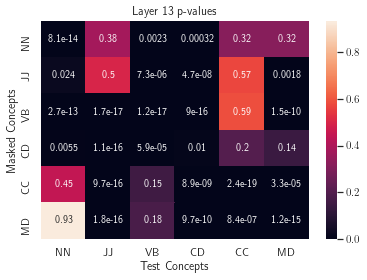

In [151]:
df = plot_pvalues(p_values_file)
sns.heatmap(df, annot=True)
sns.set(rc={'text.usetex': True})
plt.title(f"Layer {layer} p-values")
plt.xlabel("Test Concepts")
plt.ylabel("Masked Concepts")
plt.savefig(f"p_values_{layer}.png")

In [7]:
def plot_tcavs(pickled_file, layer):
    index = []
    tcavs_dict = {}
    with open(pickled_file, "rb") as reader:
        unpickled_file = pickle.load(reader)
        
    for k, v in unpickled_file.items():
        index.append(k)
    
    for k, v in unpickled_file.items():
        # fill in the rejections with 0
        layer_tcav = v[layer]
        for ix in index:
            if ix not in v[layer].keys():
                layer_tcav[ix] = 0.0
                
        for concept, tcav in v[layer].items():
            if concept in tcavs_dict.keys():
                tcavs_dict[concept].append(tcav)
            else:
                tcavs_dict[concept] = []
                tcavs_dict[concept].append(tcav)
    
    tcavs_dict = {k: tcavs_dict[k] for k in index}
    df = pd.DataFrame(tcavs_dict, index=index)
    return df

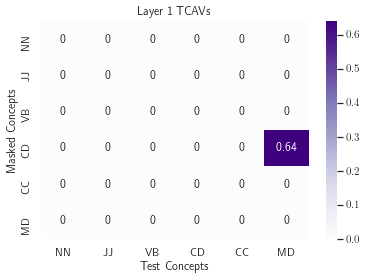

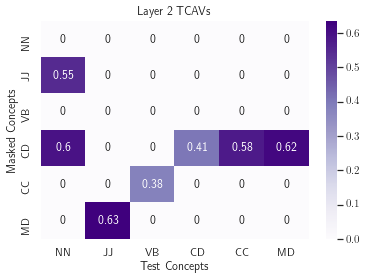

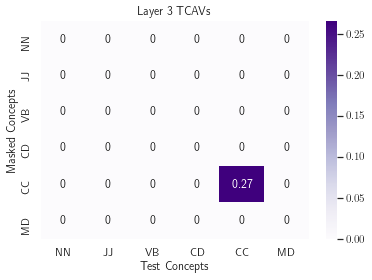

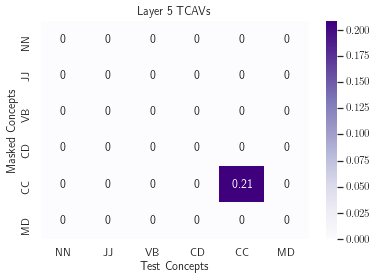

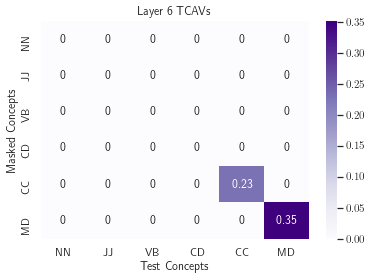

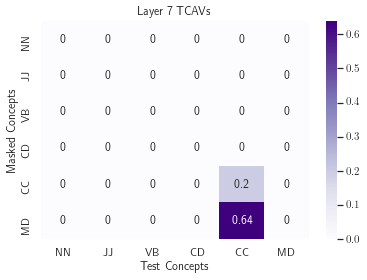

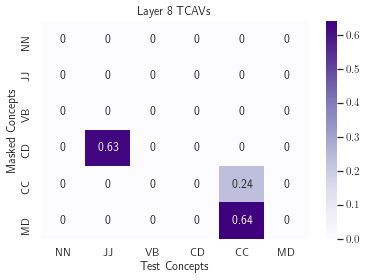

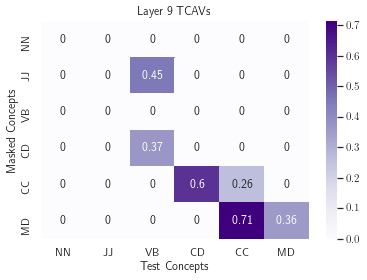

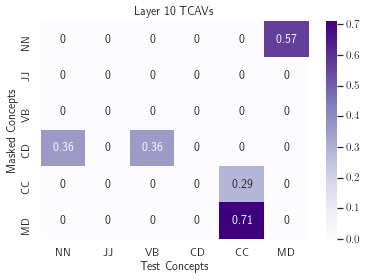

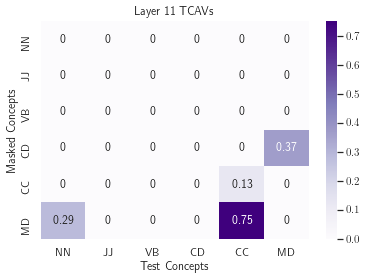

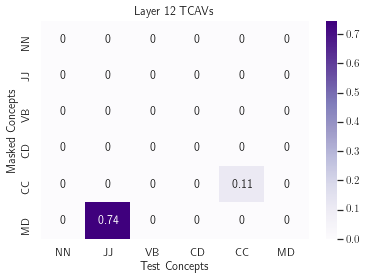

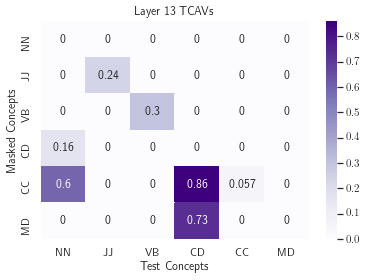

In [12]:
for ix in range(13):
    layer = str(ix+1)
    if layer != "4":
        tcav_scores_file = f"/Users/Janjua/Desktop/QCRI/Work/final_paper_results/grads_no_mask/L{layer}_inference_word_mode_unmasked_test.pickle"
        tcavs_df = plot_tcavs(tcav_scores_file, layer)
        sns.heatmap(tcavs_df, annot=True, cmap="Purples")
        sns.set(rc={'text.usetex': True})
        plt.title(f"Layer {layer} TCAVs")
        plt.xlabel("Test Concepts")
        plt.ylabel("Masked Concepts")
        plt.savefig(f"tcavs_{layer}.png")
        plt.show()

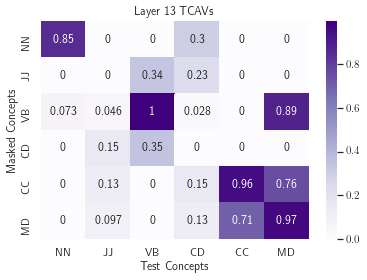

In [114]:
sns.heatmap(tcavs_df, annot=True, cmap="Purples")
sns.set(rc={'text.usetex': True})
plt.title(f"Layer {layer} TCAVs")
plt.xlabel("Test Concepts")
plt.ylabel("Masked Concepts")
plt.savefig(f"tcavs_{layer}.png")

## Show Multiple Plots Here - Layer 1, 7, 8, 11, 12, 13

In [137]:
from glob import glob
import cv2

In [138]:
tcav_plots = sorted([x for x in glob("*.png") if "tcavs" in x])

['0_tcavs_1.png', '1_tcavs_7.png', '2_tcavs_8.png', '3_tcavs_11.png', '4_tcavs_12.png', '5_tcavs_13.png']
6


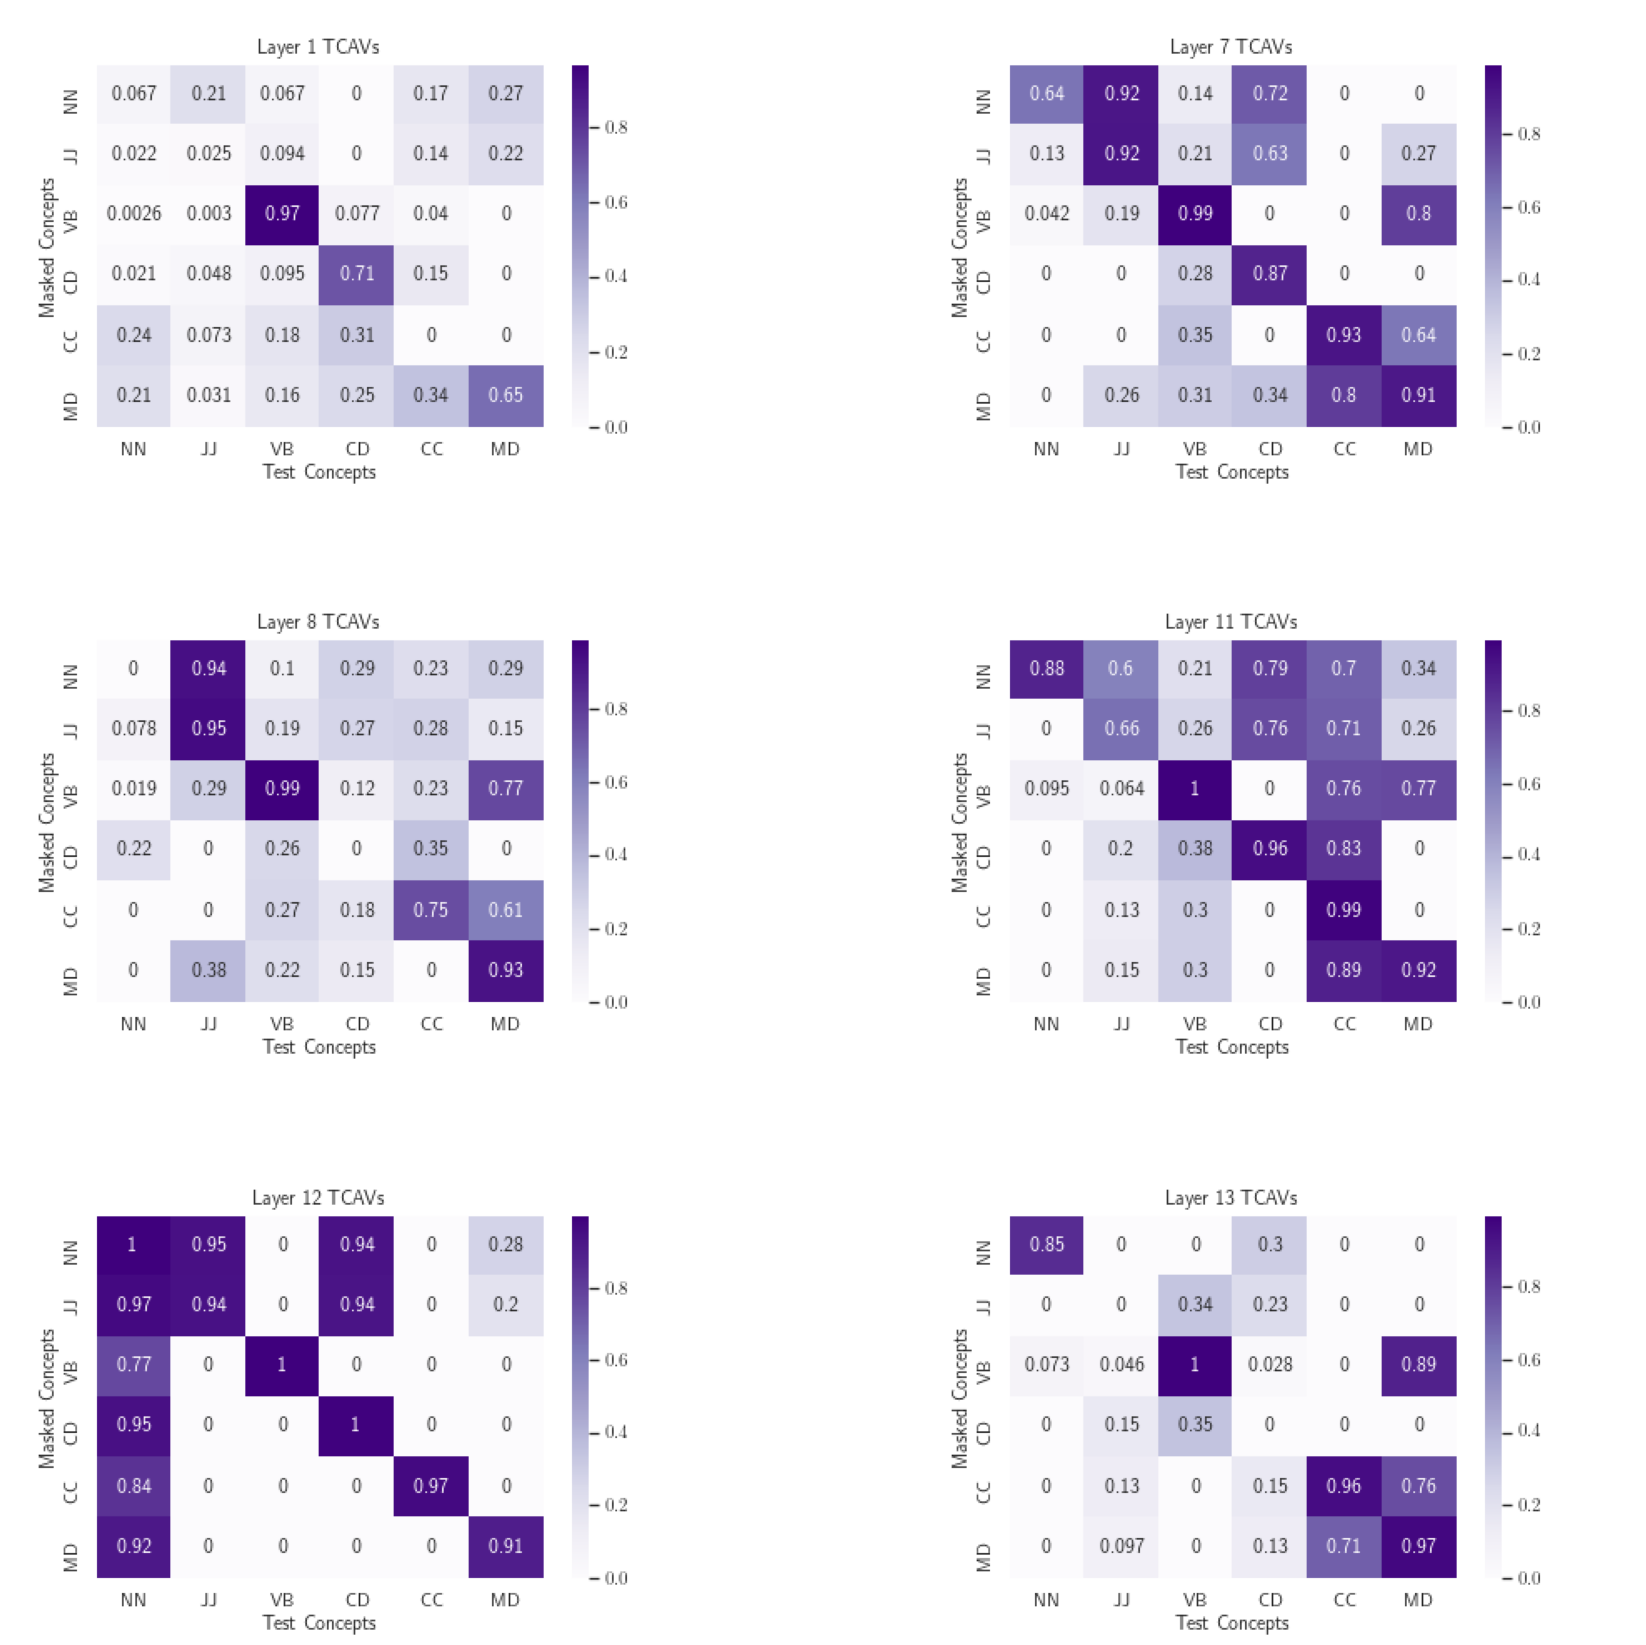

In [143]:
fig = plt.figure(figsize=(30, 30))
columns = 2
rows = 3
for i in range(1, columns*rows+1):
    img = cv2.imread(tcav_plots[i-1])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
plt.savefig(f"multi_layer.png")
plt.show()